In [1]:


#Check the enviroment that Jupyter is using:
#import sys
#sys.executable

import numpy as np
#Machine learning library:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#NOTE on scikit-learn: Is used for typical Machine Learning Algorihms and not Deep-learning.

#Image processing library:
from skimage import io, color
#Plotting library:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#CSV handler: https://docs.python.org/3/library/csv.html 
import csv
#Web handler: https://pypi.org/project/requests/
import requests 
# https://pandas.pydata.org/ 
import pandas as pd 
#Pillow library for images: https://pypi.org/project/Pillow/
from PIL import Image
#BytesIO: https://docs.python.org/3/library/io.html
from io import BytesIO
import io
#For concurrency and asynchronous operation
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor
import threading
import multiprocessing
from multiprocessing import Pool, cpu_count, Lock, Manager, process
#Counter for counting elements and unique elements
from collections import Counter
#OS file manipulation
import os 
import platform
#Math operations
import math
#Run another async loop inside Jupyter
import shutil
import seaborn as sns

Total number of image dimensions: 346721


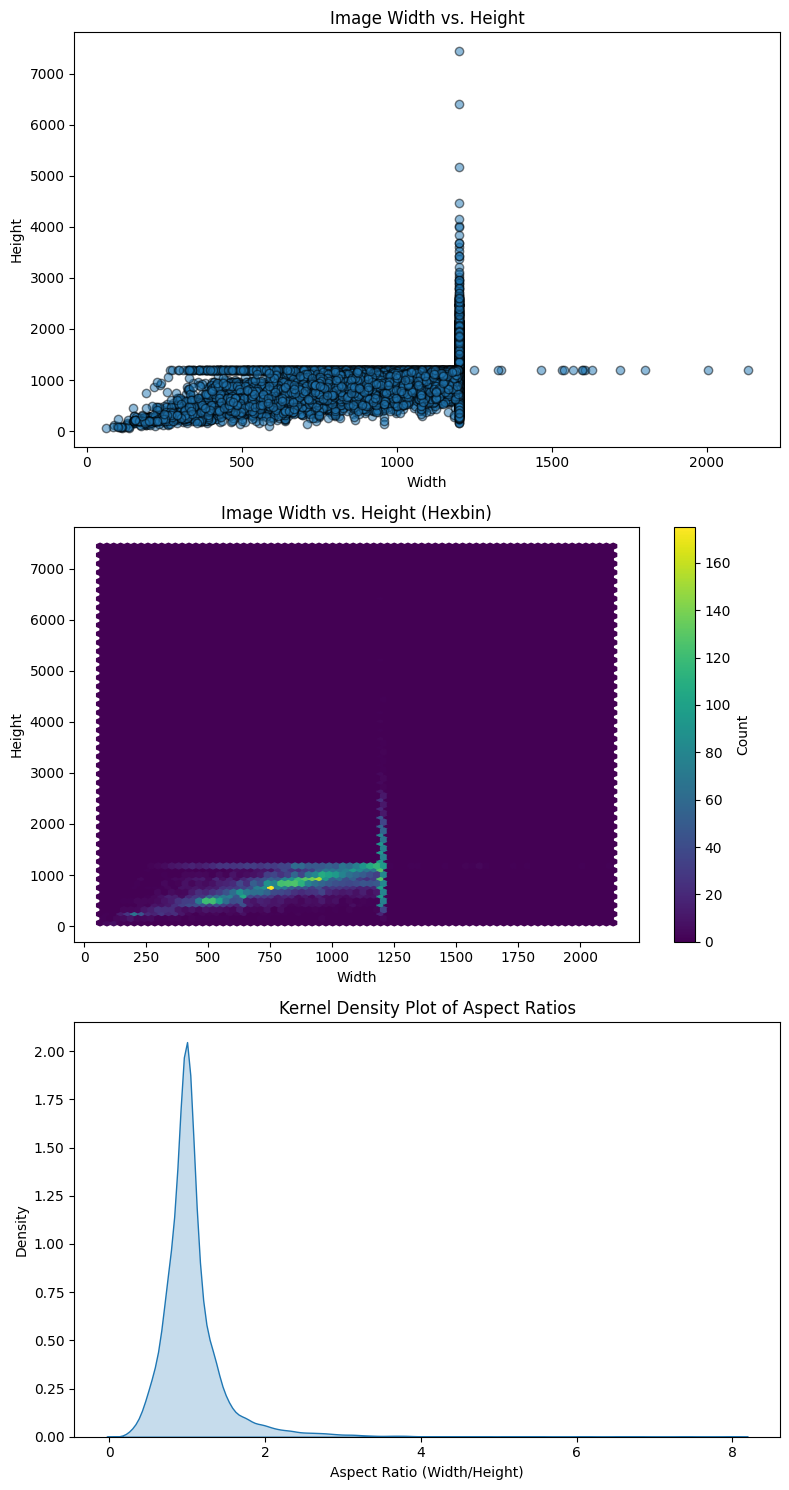

In [7]:
# Read and plot the image sizes of the original full dataset

# Replace with your file path
file_path = '/home/magnusjsc/Skrivebord/Classification-and-3D-reconstruction-of-archaeological-artifacts/python_scripts/processed_images_dimensions.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Sum of total images
total_occurrences = df['Occurrences'].sum()
print(f'Total number of image dimensions: {total_occurrences}')

# Log scale the 'Occurrences' column - More precision for large amount of data points
df['Log_Occurrences'] = np.log(df['Occurrences'])

# Calculate the 'Dimensions' column by combining 'Width' and 'Height
df['Dimensions'] = df['Width'].astype(str) + 'x' + df['Height'].astype(str)

# Calculate the 'Aspect Ratio' column
df['Aspect Ratio'] = df['Width'] / df['Height']

# Plot the figures ontop of eachother. 3 rows with 1 plot in each
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 15))

# Plot image width vs. height
ax1.scatter(df['Width'], df['Height'],edgecolor='k' ,alpha=0.5)
ax1.set_title('Image Width vs. Height')
ax1.set_xlabel('Width')
ax1.set_ylabel('Height')

# Create a hexbin plot for image width vs. height
hb = ax2.hexbin(df['Width'], df['Height'], gridsize=75, cmap='viridis')
ax2.set_title('Image Width vs. Height (Hexbin)')
ax2.set_xlabel('Width')
ax2.set_ylabel('Height')
# Add a colorbar to the hexbin plot
cb = plt.colorbar(hb)
cb.set_label('Count')
# Set the x-axis locator and formatter for the hexbin plot
ax2.xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
ax2.xaxis.set_major_formatter(plt.ScalarFormatter())

# Create a KDE plot for aspect ratios
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html 
sns.kdeplot(df['Aspect Ratio'], ax=ax3, fill=True)
ax3.set_title('Kernel Density Plot of Aspect Ratios')
ax3.set_xlabel('Aspect Ratio (Width/Height)')

# Display the plots side by side
plt.tight_layout()
plt.show()

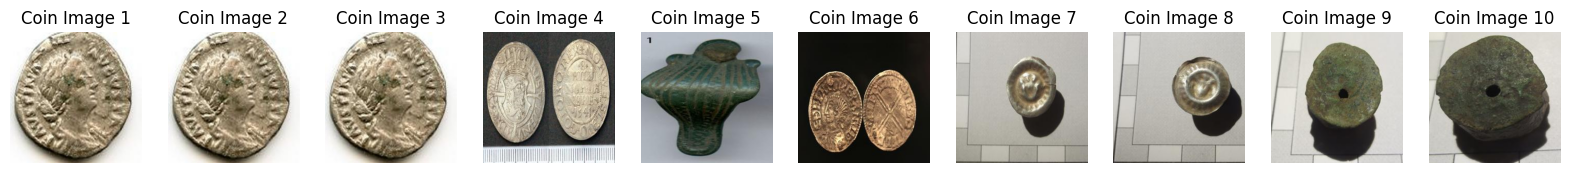

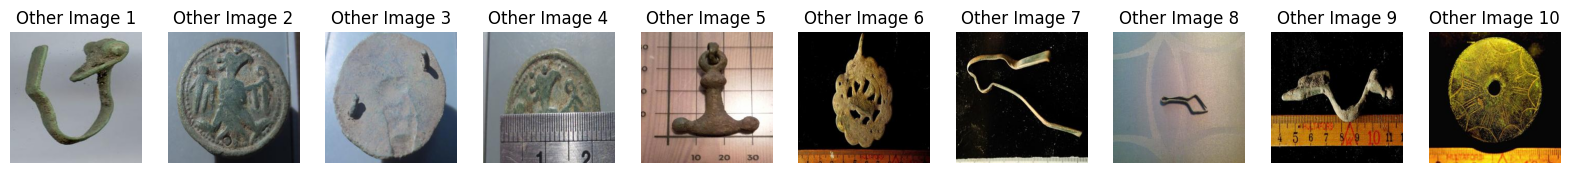

In [12]:
# Display the 10 coin images and 10 others images - how they look like

coin_path = '/run/media/magnusjsc/T7/Classification-and-3D-reconstruction-of-archaeological-artifacts_DATA/resized_images_coin_256x256/'
others_path = '/run/media/magnusjsc/T7/Classification-and-3D-reconstruction-of-archaeological-artifacts_DATA/resized_images_others_256x256/'

num_coin_images_to_display = 10
num_others_image_to_display = 10

#Create subplot
fig, axes = plt.subplots(1, num_coin_images_to_display, figsize=(20, 5))  # Adjust the figure(s) size as needed
fig2, axes2 = plt.subplots(1, num_others_image_to_display, figsize=(20, 5))

coin_files = os.listdir(coin_path)

# Load and display the first 10 coin images
for i in range(num_coin_images_to_display):
    image_path = os.path.join(coin_path, coin_files[i])  
    image = mpimg.imread(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f'Coin Image {i + 1}')
    axes[i].axis('off')

others_files = os.listdir(others_path)

# Load and display the first 10 images from the "others" category
for i in range(num_others_image_to_display):
    image_path = os.path.join(others_path, others_files[i]) 
    image = mpimg.imread(image_path)
    axes2[i].imshow(image)
    axes2[i].set_title(f'Other Image {i + 1}')
    axes2[i].axis('off')

Size of data_coins 50 : Size of labels_coins 50
Size of data_others 50 : Size of labels_others 50


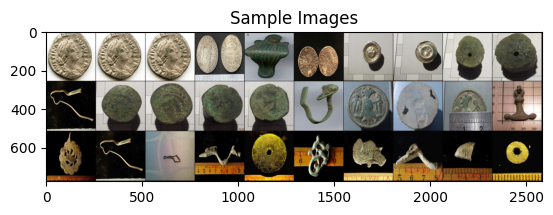

In [2]:
# Load data from external source
import os
from torchvision.io import read_image
import matplotlib.pyplot as plt
import torchvision
import numpy as np

# Docs:
# https://pytorch.org/tutorials/beginner/basics/data_tutorial.html?highlight=dataloader

# 256x256 images
path_to_coins = "/run/media/magnusjsc/T7/Classification-and-3D-reconstruction-of-archaeological-artifacts_DATA/resized_images_coin_256x256/"
path_to_others = "/run/media/magnusjsc/T7/Classification-and-3D-reconstruction-of-archaeological-artifacts_DATA/resized_images_others_256x256/"

def load_data_from_directory_with_limit(directory_path, label, limit=10000):
    data = []
    labels = []
    count = 0

    for filename in os.listdir(directory_path):
        if filename.endswith(".jpg"): 
            image_path = os.path.join(directory_path, filename)
            image = read_image(image_path)

            # Check if the image is RGB
            if image.shape[0] == 3:
                data.append(image)
                labels.append(label)
                count += 1

            if count >= limit:
                break

    return data, labels # Tuple

# Load data call
data_coins, labels_coins = load_data_from_directory_with_limit(path_to_coins, label=0, limit=50)
data_others, labels_others = load_data_from_directory_with_limit(path_to_others, label=1, limit=50)

print(f'Size of data_coins {len(data_coins)} : Size of labels_coins {len(labels_coins)}')
print(f'Size of data_others {len(data_others)} : Size of labels_others {len(labels_others)}')

def imshow_grid(images, num_images=30):
    grid = torchvision.utils.make_grid(images[:num_images], nrow=10)
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.title('Sample Images')
    plt.axis('on')
    plt.show()

num_images_to_display_per_category = 15
data_to_display = data_coins[:num_images_to_display_per_category] + data_others[:num_images_to_display_per_category]
imshow_grid(data_to_display, num_images=num_images_to_display_per_category * 2)

In [3]:
import os
from torch.utils.data import Dataset, DataLoader, ConcatDataset, random_split
from torchvision import transforms
from torchvision.io import read_image
import torch
import torchvision
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import numpy as np

class customDataset(Dataset):
    def __init__(self, tensors, transform=None):
        # Check the sizes of data and labels match
        assert all(tensors[0].size(0)==t.size(0) for t in tensors), "Size mismatch between tensors"

        # Assign input
        self.tensors = tensors
        self.transform = transform

    # What to do when we want an item from the dataset
    def __getitem__(self, index):
        # Return the transformed version of x if there are transforms
        if self.transform:
            x = self.transform(self.tensors[0][index])
        else: 
            x = self.tensors[0][index]

        # And return the label too
        y = self.tensors[1][index].view(1) # Convert y to a single-element tensor

        return x,y # Return the data as a tuple (data,label)

    def __len__(self):
        return self.tensors[0].size(0)


# Create a list of  transforms
imgTrans = transforms.Compose(
    [
        transforms.ToPILImage(), # PIL = library for images - Works for several transformations. To PIL image type
        transforms.RandomVerticalFlip(p=.5),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor() # Transform the image to PyTorch tensor and normalizes the data [0;1] - Last 
    ]
)

# To Torch tensors
coin_dataT = torch.stack(data_coins)
coin_labelsT = torch.tensor(labels_coins)
other_dataT = torch.stack(data_others)
other_labelsT = torch.tensor(labels_others)

# For the Coin dataset
coin_data_transformed_defined = customDataset(tensors=(coin_dataT, coin_labelsT), transform=imgTrans)
# For the Other dataset
other_data_transformed_defined = customDataset(tensors=(other_dataT, other_labelsT), transform=imgTrans)
# Combine these two above datasets
combined_dataset_transformed_defined = ConcatDataset([coin_data_transformed_defined, other_data_transformed_defined])

# Split the data for training, validation, and testing
training = 0.7
validation = 0.15
testing = 0.15

total_size = len(combined_dataset_transformed_defined)
train_size = int(training * total_size)
val_size = int(validation * total_size)
test_size = total_size - train_size - val_size

# Randomly split the full dataset into training, validation and testing sets
train_set, val_set, test_set = random_split(combined_dataset_transformed_defined, [train_size, val_size, test_size])

# Hyperparameter - Batch size 
BATCH_SIZE = 24
# Create data loaders for each set
coin_loader = DataLoader(coin_data_transformed_defined, batch_size=BATCH_SIZE, shuffle=False) # For test below cell
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True) # Shuffle the training set
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False)

print(f'Total number of elements in train_loader: {len(train_loader) * BATCH_SIZE} : Each batch size {len(train_loader)}')
print(f'Total number of elements in val_loader: {len(val_loader) * BATCH_SIZE} : Each batch size {len(val_loader)}')
print(f'Total number of elements in test_loader: {len(test_loader) * BATCH_SIZE} : Each batch size {len(test_loader)}')

Total number of elements in train_loader: 72 : Each batch size 3
Total number of elements in val_loader: 24 : Each batch size 1
Total number of elements in test_loader: 24 : Each batch size 1


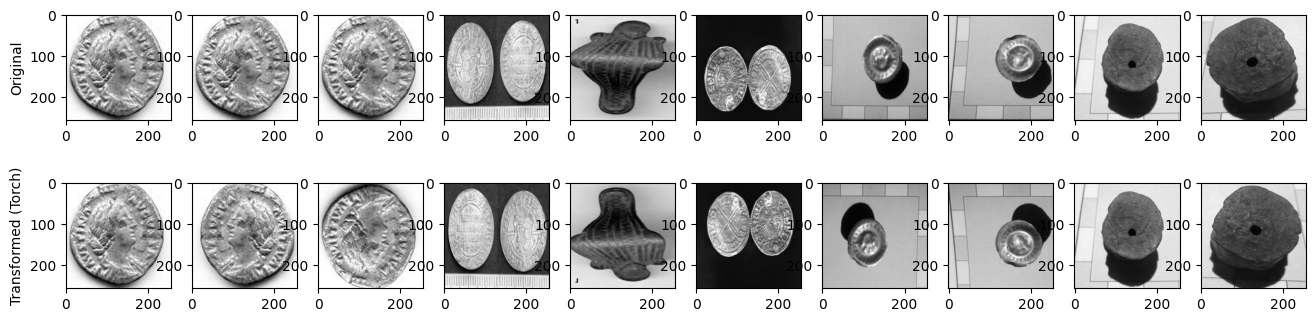

In [3]:
# Get a mini-batch from the train_loader and show differences before and after transformation
# Get the first 10 images from the train_loader
X, y = next(iter(coin_loader))

fig, axs = plt.subplots(2, 10, figsize=(16, 4))

# Loop over the first 10 images
for i in range(10):
    # Original images
    axs[0, i].imshow(coin_dataT[i, 0, :, :].detach().numpy(), cmap='gray')
    # Transformed images
    axs[1, i].imshow(X[i, 0, :, :].detach().numpy(), cmap='gray')

# Set labels
axs[0, 0].set_ylabel('Original')
axs[1, 0].set_ylabel('Transformed (Torch)')

plt.show()

In [4]:
# Pytorch CNN: 
import torch
import torchvision
import torch.nn as nn 
import torch.nn.functional as F # Functions like ReLu
from torchinfo import summary # Get model behavior during training - https://pypi.org/project/torchinfo/
import numpy as np
from torch.optim import Adam

# Docs: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
# Conv2d docs: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

# Const variables
RGB = 3 
N_CLASSES = 1 # Coin -Coin
IMAGE_SIZE = 256 # 256x256

def createTheCoinClassifier(printtoggle = False):
    class CoinClassifier(nn.Module):
        def __init__(self, printtoggle = False):
            super().__init__()
            self.print = printtoggle

            print('Coin Classifier properties: ')
            print('--------------------------------------------')
            # CNN Block - NOTE: Conv is a linear operation -> Remember ReLu: 
            # First layer init: 3 input channel image, 6 output channels, 3x3 square conv. kernel. Learnable Bias (True). Groups of 1 i.e. on Conv layer at a time seeing the input.
            # Padding is added to all 4 sides.
            self.conv1 = nn.Conv2d(
                in_channels = RGB, 
                out_channels = 20, 
                kernel_size = (5,5), 
                stride = 1, 
                padding = 0, 
                padding_mode = 'zeros', 
                bias = True, 
                groups = 1
            ) 
            
            self.maxpool1 = nn.MaxPool2d(
                kernel_size = (2,2), 
                stride = 2
            )
            
            # Second layer init
            self.conv2 = nn.Conv2d(
                in_channels = 20, 
                out_channels = 10, 
                kernel_size = (3,3), 
                stride = 2, 
                padding = 1, 
                padding_mode = 'zeros', 
                bias = True, 
                groups = 1
            ) 
            
            self.maxpool2 = nn.MaxPool2d(
                kernel_size = (2,2), 
                stride = 2
            )

            # Instantiated on the run - See forward method
            self.ffc_dim = 0
            self.fc1 = None
            self.fc2 = None
            print('--------------------------------------------')
            
        # Define how the network is connected using this forward function
        def forward(self, x):
            device = next(self.parameters()).device
            print(f'Input: {x.shape}') if self.print else None
            
            # CNN
            x = self.conv1(x)
            x = F.relu(x)  # Apply ReLU activation
            x = self.maxpool1(x)
            print(f'Layer conv1/pool1: {x.shape}') if self.print else None
    
            x = self.conv2(x)
            x = F.relu(x)  # Apply ReLU activation
            x = self.maxpool2(x)
            print(f'Layer conv2/pool2: {x.shape}') if self.print else None

            # tensor[(0)BS, (1)C, (2)H, (3)W] - Calculate the FFN dimension input size 
            self.ffc_dim = int(
                np.floor(x.size(1) * (x.size(2) * x.size(3))) # BS is omitted since the linear layers only takes an image at a time
            )
    
            # Initialize fully connected layers only when ffc_dim is determined
            if self.fc1 is None:
                self.fc1 = nn.Linear(
                    in_features = self.ffc_dim,
                    out_features = 600,
                    bias = True
                ).to(device)
    
                self.fc2 = nn.Linear(
                    in_features = 600,
                    out_features = N_CLASSES,
                    bias = True
                ).to(device)
            
            # Flatten maps for FC layers
            x = x.view(x.size(0), -1)
            
            x = self.fc1(x)
            x = F.relu(x)
            x = self.fc2(x)
            return x

    # Model
    model = CoinClassifier(printtoggle)
    # Loss function
    lossFun = nn.BCEWithLogitsLoss() # BCE=−1/n​∑i=1​(y_i​log(yHat_​i​)+(1−y_i​)log(1−yHat_i​))
    # Optimizer 
    optimizer = Adam(model.parameters(), lr=.001)

    return model, lossFun, optimizer
    

# Check parameters in the model
model, loss_fun, optimizer = createTheCoinClassifier()
# Use summary to get model details
summary(
    model = model, 
    input_size = (30, 3, 256, 256), 
    verbose = 2, 
    col_names=["kernel_size", "output_size", "num_params", "mult_adds"],
)


'''
Summary notes: 
    The number of weights is higher due to the size of features maps. 
    The bias is for each feature map, therefore a smaller number.
'''

Coin Classifier properties: 
--------------------------------------------
--------------------------------------------
Layer (type:depth-idx)                   Kernel Shape              Output Shape              Param #                   Mult-Adds
CoinClassifier                           --                        [30, 1]                   --                        --
├─Conv2d: 1-1                            [5, 5]                    [30, 20, 252, 252]        1,520                     2,895,782,400
│    └─weight                            [3, 20, 5, 5]                                       ├─1,500
│    └─bias                              [20]                                                └─20
├─MaxPool2d: 1-2                         [2, 2]                    [30, 20, 126, 126]        --                        --
├─Conv2d: 1-3                            [3, 3]                    [30, 10, 63, 63]          1,810                     215,516,700
│    └─weight                            [20,

'\nSummary notes: \n    The number of weights is higher due to the size of features maps. \n    The bias is for each feature map, therefore a smaller number.\n'

Coin Classifier properties: 
--------------------------------------------
--------------------------------------------
Epoch 1, Loss: 0.6932955582936605
Epoch 1, Validation Loss: 0.6944888830184937, ROC AUC: 0.14285714285714288
Epoch 1, Test Loss: 0.6921798586845398, Precision: 1.0, Recall: 0.0, F1 Score: 0.0, ROC AUC: 0.6785714285714286
Epoch 2, Loss: 0.6920937299728394
Epoch 2, Validation Loss: 0.6938747763633728, ROC AUC: 0.375
Epoch 2, Test Loss: 0.6917212009429932, Precision: 1.0, Recall: 0.0, F1 Score: 0.0, ROC AUC: 0.7142857142857143
Epoch 3, Loss: 0.6930168271064758
Epoch 3, Validation Loss: 0.693394660949707, ROC AUC: 0.48214285714285715
Epoch 3, Test Loss: 0.6922040581703186, Precision: 1.0, Recall: 0.0, F1 Score: 0.0, ROC AUC: 0.6428571428571428
Epoch 4, Loss: 0.6921164790789286
Epoch 4, Validation Loss: 0.6929731965065002, ROC AUC: 0.5357142857142857
Epoch 4, Test Loss: 0.6898490786552429, Precision: 1.0, Recall: 0.0, F1 Score: 0.0, ROC AUC: 0.9642857142857143
Epoch 5, Loss

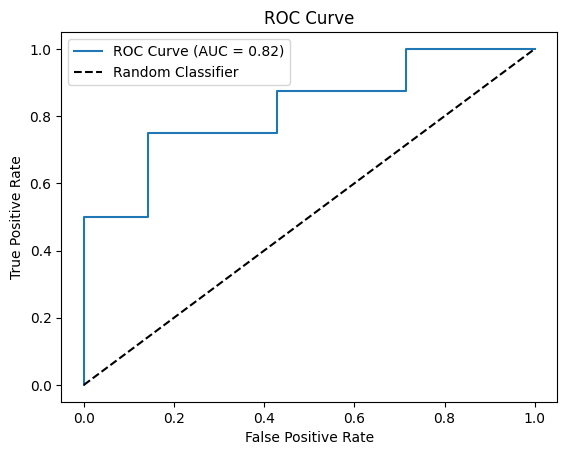

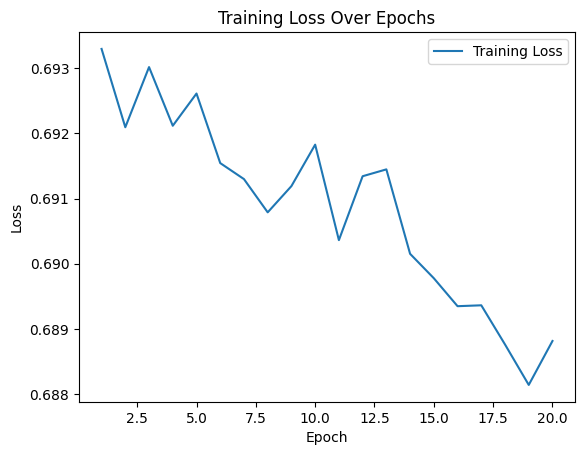

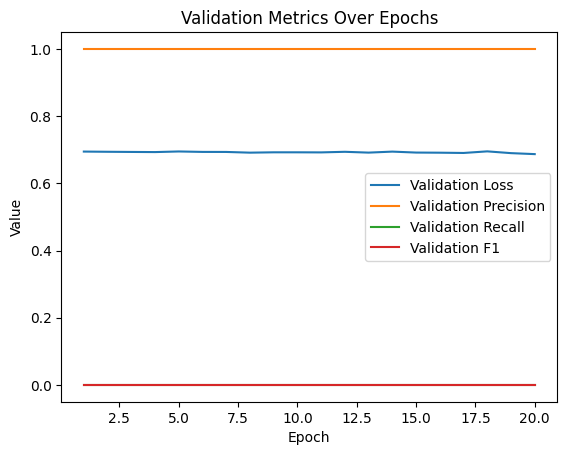

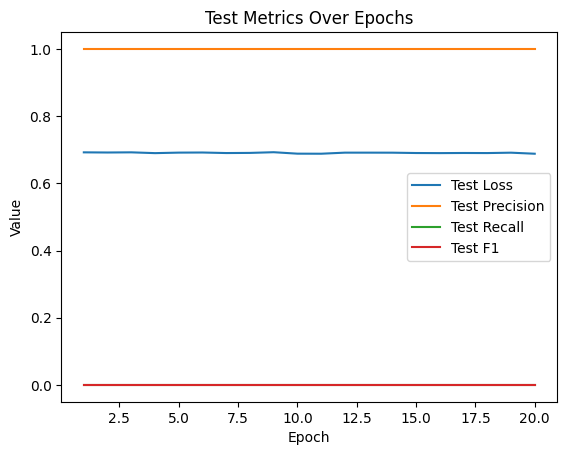

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

model, criterion, optimizer = createTheCoinClassifier()

# Lists to store training losses and validation metrics
train_losses = []

# Metrics for classification
validation_metrics = {
    "loss": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "roc_auc": []  
}

test_metrics = {
    "loss": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "roc_auc": []  
}

# Training loop
epochs = 20
threshold = 0.45
for epoch in range(epochs):
    running_train_loss = 0.0
    model.train()  # Set the model to training mode
    for i, data in enumerate(train_loader, 0):
        # Get inputs and labels from the data loader
        inputs, labels = data
        # Clear any previously computed gradients
        optimizer.zero_grad()
        # Forward pass - Compute model predictions using the input data
        outputs = model(inputs)
        # Ensure that labels are of float data type for BCE loss
        labels = labels.float()
        # Calculate the loss by comparing the model's predictions to the true labels
        loss = criterion(outputs, labels)
        # Backpropagate the gradients to update the model's parameters
        loss.backward()
        # Update the model's parameters (weights and biases) using the optimizer
        optimizer.step()
        # Accumulate the loss for this batch to calculate the average loss for the epoch
        running_train_loss += loss.item()

    # Calculate the average loss for this epoch
    average_loss = running_train_loss / len(train_loader)
    train_losses.append(average_loss)
    print(f"Epoch {epoch + 1}, Loss: {average_loss}")

# Validation step - For each epoch
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        running_val_loss = 0.0
        all_probs = []
    
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            labels = labels.float()
            val_loss = criterion(outputs, labels)
            running_val_loss += val_loss.item()
    
            # Apply the threshold to get binary predictions - Normalization into binary (0||1)
            binary_preds = (outputs >= threshold).float() # Returns 1 for true and 0 if false -> Condition check
    
            # Append the true labels to all_labels - in order
            all_labels.extend(labels.tolist())
    
            # Append binary predictions to all_preds
            all_preds.extend(binary_preds.tolist()) # Predictions
    
            # Get the probability for the positive class (class 1) - For ROC. Negative y^ < 0.5 and positive if y^ > 0.5
            positive_probs = torch.sigmoid(outputs).numpy() # To numpy array - prob between [0;1] using sigmoid. Numpy is for numerical purposes
            all_probs.extend(positive_probs) # Probabilities based on output of the model
    
        average_val_loss = running_val_loss / len(val_loader)
        validation_metrics["loss"].append(average_val_loss)
        validation_metrics["precision"].append(precision_score(all_labels, all_preds, zero_division = 1, average = 'binary'))
        validation_metrics["recall"].append(recall_score(all_labels, all_preds))
        validation_metrics["f1"].append(f1_score(all_labels, all_preds))
    
        # Calculate ROC Curve - fpr = False Positive Rate, tpr = True Positive Rate
        fpr, tpr, thresholds = roc_curve(all_labels, all_probs) # Based on all probabilties and the true labels
        roc_auc = roc_auc_score(all_labels, all_probs)
        validation_metrics["roc_auc"].append(roc_auc)
    
        print(f"Epoch {epoch + 1}, Validation Loss: {average_val_loss}, ROC AUC: {roc_auc}")

    
    # Test step - For each epoch
    model.eval()  # Set the model to evaluation mode
    all_preds_test = []
    all_labels_test = []
    all_probs_test = []
    
    with torch.no_grad():
        running_test_loss = 0.0
        
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            labels = labels.float()
            test_loss = criterion(outputs, labels)
            running_test_loss += test_loss.item()
    
            # Apply the threshold to get binary predictions
            binary_preds = (outputs >= threshold).float()
            all_labels_test.extend(labels.tolist())
            all_preds_test.extend(binary_preds.tolist())
    
            # Get the probability for the positive class (class 1) - For ROC
            positive_probs_test = torch.sigmoid(outputs).numpy()
            all_probs_test.extend(positive_probs_test)
    
        average_test_loss = running_test_loss / len(test_loader)
        test_precision = precision_score(all_labels_test, all_preds_test, zero_division=1, average='binary')
        test_recall = recall_score(all_labels_test, all_preds_test)
        test_f1 = f1_score(all_labels_test, all_preds_test)
        test_roc_auc = roc_auc_score(all_labels_test, all_probs_test)
    
        print(f"Epoch {epoch + 1}, Test Loss: {average_test_loss}, Precision: {test_precision}, Recall: {test_recall}, F1 Score: {test_f1}, ROC AUC: {test_roc_auc}")
    
        # Store test metrics
        test_metrics["loss"].append(average_test_loss)
        test_metrics["precision"].append(test_precision)
        test_metrics["recall"].append(test_recall)
        test_metrics["f1"].append(test_f1)
        test_metrics["roc_auc"].append(test_roc_auc)


# ROC Curve graph for validation
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot the training loss
plt.figure()
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Plot validation metrics over epochs
plt.figure()
for metric_name, values in validation_metrics.items():
    if metric_name != "roc_auc":
        plt.plot(range(1, epochs + 1), values, label=f'Validation {metric_name.capitalize()}')

plt.xlabel('Epoch')
plt.title('Validation Metrics Over Epochs')
plt.ylabel('Value') 
plt.legend()
plt.show()

# Plot test metrics over epochs
plt.figure()
for metric_name, values in test_metrics.items():
    if metric_name != "roc_auc":
        plt.plot(range(1, epochs + 1), values, label=f'Test {metric_name.capitalize()}')

plt.xlabel('Epoch')
plt.title('Test Metrics Over Epochs')
plt.ylabel('Value') 
plt.legend()
plt.show()

In [7]:
# Hyperparameter tuning with Ray Tune for the CNN

# CNN
import torch
import torchvision
import torch.nn as nn 
import torch.nn.functional as F 
import numpy as np
from torch.optim import Adam

# Ray Tune 
import ray 
from ray import tune, train 
from ray.tune.schedulers import ASHAScheduler

# Const variables
RGB = 3 
N_CLASSES = 1 # Coin -Coin
IMAGE_SIZE = 256 # 256x256

# Shutdown the Ray server explicitly before running
def restart_ray_tune_server():
    ray.shutdown()

class CNN_Coin_classifier_model(nn.Module): 
    def __init__(
        self,
        config: dict 
    ):
        super(CNN_Coin_classifier_model, self).__init__()

        self.conv1 = nn.Conv2d(
            in_channels = RGB, # Color channels
            out_channels = config["out_channels_first_conv_layer"], # Feature maps
            kernel_size = config["kernel_Size_conv"], # They are automatically squared 
            stride = config["stride_conv"],
            bias = True,
            padding = config["padding_conv"],
            padding_mode = "zeros", # Borders will have no influence
            groups = 1
        )
        
        self.pool1 = nn.MaxPool2d( # Return the same number of feature maps but they are each smaller 
            kernel_size = config["kernel_Size_pool"],
            stride = config["stride_pool"]
        )
    
        self.conv2 = nn.Conv2d(
            in_channels = config["out_channels_first_conv_layer"],
            out_channels = config["out_channels_second_conv_layer"],
            kernel_size = config["kernel_Size_conv"], # They are automatically squared 
            stride = config["stride_conv"],
            bias = True,
            padding = config["padding_conv"],
            padding_mode = "zeros",
            groups = 1
        )
    
        self.pool2 = nn.MaxPool2d(
            kernel_size = config["kernel_Size_pool"],
            stride = config["stride_pool"]
        )

        self.ffc_dim = 0
        self.fc1 = None
        self.fc2 = None
    
    def forward(self, x, config):
        device = next(self.parameters()).device
        
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = F.relu(x)  
        x = self.pool2(x)

        # tensor[(0)BS, (1)C, (2)H, (3)W]
        self.ffc_dim = int(
            np.floor(x.size(1) * (x.size(2) * x.size(3))) # BS is omitted since the linear layers only takes an image at a time
        )

        # Initialize fully connected layers only when ffc_dim is determined
        if self.fc1 is None:
            self.fc1 = nn.Linear(
                in_features=self.ffc_dim,
                out_features=config["ffn_out_features"],
                bias=True
            ).to(device)

            self.fc2 = nn.Linear(
                in_features=config["ffn_out_features"],
                out_features=N_CLASSES,
                bias=True
            ).to(device)

        # Flatten maps for FC layers
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)

        return x 


def ray_tune(config: dict, train_loader = train_loader, val_loader = val_loader): 
    
    device = "cpu"
    if torch.cuda.is_available(): 
        print('Cuda is available')
        device = "cuda:0"
    else: 
        print('Cuda NOT available')

    cnn_model = CNN_Coin_classifier_model(config = config)

    # Loss function
    loss_func = nn.BCEWithLogitsLoss() # BCE=−1/n​∑i=1​(y_i​log(yHat_​i​)+(1−y_i​)log(1−yHat_i​))

    # Put model and data into ray object store
    model_id = ray.put(cnn_model)
    train_loader_id = ray.put(train_loader)
    val_loader_id = ray.put(val_loader)
    
    # Optimizer 
    optimizer = Adam(
        cnn_model.parameters(), 
        lr = config['lr'],
        weight_decay = config['weight_decay']
    )

    model = ray.get(model_id)
    model = model.to(device)
    train_loader = ray.get(train_loader_id)
    val_loader = ray.get(val_loader_id)

    train_loader_ray = DataLoader(
        train_set, 
        batch_size = config['batch_size'], 
        shuffle=True
    ) # Shuffle the training set
    val_loader_ray = DataLoader(
        val_set, 
        batch_size = config['batch_size'], 
        shuffle=False
    )

    nEpochs = config['nEpochs']
    for epoch in range(nEpochs):
        running_loss = 0.0
        epoch_steps = 0
        model.train()
        # Training 
        for i, data, in enumerate(train_loader_ray, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device) 

            labels = labels.float()
            
            optimizer.zero_grad()
            output = model(inputs, config) # Forward
            
            loss = loss_func(output, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            epoch_steps += 1 

        # Validation 
        val_loss = 0.0
        val_steps = 0
        total = 0 
        correct = 0 
        model.eval()
        for i, data in enumerate(val_loader_ray, 0):
            with torch.no_grad():
                inputs_val, labels_val = data
                inputs_val, labels_val = inputs.to(device), labels.to(device)

                labels_val = labels_val.float()

                output_val = model(inputs_val, config)
                
                predicted = torch.sigmoid(output_val) > config["threshold"]
                total += labels_val.size(0)
                correct += (predicted == labels_val).sum().item() 
                loss = loss_func(output_val, labels_val.float())
                val_loss += loss.cpu().numpy() 
                val_steps += 1 

        train.report({"accuracy": correct / total})
        


def setup_ray_tune_and_run():
    # Configs/Hyperparameters - Grid search grows exponentially due to combinatorial products
    config = {
        # Number of images?
        # Different layer structure?
        "threshold": tune.uniform(0.1, 0.9),
        "nEpochs": tune.grid_search([10, 15, 20]),
        "batch_size": tune.randint(8, 32),
        "out_channels_first_conv_layer": tune.grid_search([10, 20, 30]),
        "out_channels_second_conv_layer": tune.grid_search([10, 20, 30]), 
        "padding_conv": tune.grid_search([0, 1, 2]),
        "stride_conv": tune.grid_search([1, 2, 3]),
        "stride_pool": tune.grid_search([3, 4, 5]),
        "kernel_Size_conv": tune.grid_search([3, 4, 5]),
        "kernel_Size_pool": tune.grid_search([3, 4, 5]),
        "lr": tune.loguniform(1e-4, 1e-1),
        "ffn_out_features": tune.grid_search([300, 500, 600]),
        "weight_decay": tune.loguniform(1e-3, 1), # [0.001, 1.0]
    }
    
    scheduler = ASHAScheduler(
        grace_period = 1, 
        reduction_factor = 2,
        max_t = 10 
    )

    resources = {
        "cpu": 3,  # Number of CPU cores per trial
        "gpu": 0.5,  # Fraction of a GPU per trial (0.5 means half a GPU)
    }

    tuner = tune.Tuner(
        tune.with_resources(
            tune.with_parameters(ray_tune),
            resources = resources
        ),
        tune_config = tune.TuneConfig(
            metric = "accuracy",
            mode = "max",
            scheduler = scheduler,
            num_samples = 5 # Number of samples drawn from search space
        ),
        param_space = config,
    )
    results = tuner.fit()
    best_result = results.get_best_result("accuracy", "max")
    print(f'Best trial config: {best_result.config}')


# Start 
restart_ray_tune_server()
setup_ray_tune_and_run()

(raylet) Warning: The actor ImplicitFunc is very large (37 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
(ray_tune pid=8321) Cuda is available
(ray_tune pid=8321) Cuda is available [repeated 7x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(ray_tune pid=8321) Cuda is available [repeated 10x across cluster]
(ray_tune pid=8321) Cuda is available [repeated 14x across cluster]
(ray_tune pid=8320) Cuda is available [repeated 19x across cluster]
(ray_tune pid=8321) Cuda is available [repeated 13x across cluster]
(ray_tune pid=8320) Cuda is available [repeated 13x across cluster]
(ray_tune pid=8320) Cuda is available [repeated 10x across cluster]
(ray_tune pid=8321) Cuda is available [repeated 12x across cluster]


2023-12-30 19:17:32,808	WARNING util.py:202 -- The `callbacks.on_trial_result` operation took 1.863 s, which may be a performance bottleneck.
2023-12-30 19:17:32,811	WARNING util.py:202 -- The `process_trial_result` operation took 1.865 s, which may be a performance bottleneck.
2023-12-30 19:17:32,812	WARNING util.py:202 -- Processing trial results took 1.866 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2023-12-30 19:17:32,814	WARNING util.py:202 -- The `process_trial_result` operation took 1.868 s, which may be a performance bottleneck.


(ray_tune pid=8320) Cuda is available [repeated 10x across cluster]
(ray_tune pid=8321) Cuda is available [repeated 14x across cluster]
(ray_tune pid=8321) Cuda is available [repeated 9x across cluster]
(ray_tune pid=8321) Cuda is available [repeated 10x across cluster]
(ray_tune pid=8320) Cuda is available [repeated 12x across cluster]
(ray_tune pid=8320) Cuda is available [repeated 9x across cluster]
(ray_tune pid=8321) Cuda is available [repeated 10x across cluster]
(ray_tune pid=8320) Cuda is available [repeated 12x across cluster]
(ray_tune pid=8320) Cuda is available [repeated 9x across cluster]
(ray_tune pid=8320) Cuda is available [repeated 11x across cluster]
(ray_tune pid=8320) Cuda is available [repeated 10x across cluster]
(ray_tune pid=8321) Cuda is available [repeated 8x across cluster]


2023-12-30 19:18:32,019	WARNING tune.py:186 -- Stop signal received (e.g. via SIGINT/Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C (or send SIGINT/SIGKILL/SIGTERM) to skip. 
2023-12-30 19:18:32,637	INFO tune.py:1042 -- Total run time: 577.92 seconds (577.28 seconds for the tuning loop).
2023-12-30 19:18:32,637	WARNING tune.py:1057 -- Experiment has been interrupted, but the most recent state was saved.
Resume experiment with: Tuner.restore(path="/home/magnusjsc/ray_results/ray_tune_2023-12-30_19-08-51", trainable=...)
2023-12-30 19:18:33,504	WARNING experiment_analysis.py:193 -- Failed to fetch metrics for 16 trial(s):
- ray_tune_7e874_01172: FileNotFoundError('Could not fetch metrics for ray_tune_7e874_01172: both result.json and progress.csv were not found at /home/magnusjsc/ray_results/ray_tune_2023-12-30_19-08-51/ray_tune_7e874_01172_1172_batch_size=16,ffn_out_features=600,kernel_Size_conv=3,kernel_Size_pool=4,lr=0.0059,n

Best trial config: {'threshold': 0.4459621943527875, 'nEpochs': 10, 'batch_size': 23, 'out_channels_first_conv_layer': 20, 'out_channels_second_conv_layer': 10, 'padding_conv': 0, 'stride_conv': 1, 'stride_pool': 3, 'kernel_Size_conv': 5, 'kernel_Size_pool': 4, 'lr': 0.003079329861938031, 'ffn_out_features': 600, 'weight_decay': 0.003966966104557657}
